In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
from sklearn.model_selection import TimeSeriesSplit # To split Time format data
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv("Test_0qrQsBZ.csv")
train = pd.read_csv("Train_SU63ISt.csv")

In [3]:
# Make the copy of original datasets 
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns, test.columns # Features of the datasets

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes # Datatypes in training set

ID           int64
Datetime    object
Count        int64
dtype: object

In [6]:
test.dtypes # Datatypes in test set

ID           int64
Datetime    object
dtype: object

In [7]:
train.shape, test.shape #Shape of datasets

((18288, 3), (5112, 2))

In [8]:
train.head() # To glance the values in dataset

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [9]:
# Change the data type to datetime format to extract features from it.
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [10]:
# Extract year,month,day, hour from Datetime into seperate columns
for i in (train, test, train_original, test_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour    

In [11]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [12]:
# defining wheather a day is weekday or weekend
train['day of week']= train['Datetime'].dt.dayofweek #returns the number of the day in week
train.head()
# Storing the Datetime into temporary variable
temp = train['Datetime']


In [13]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [14]:
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


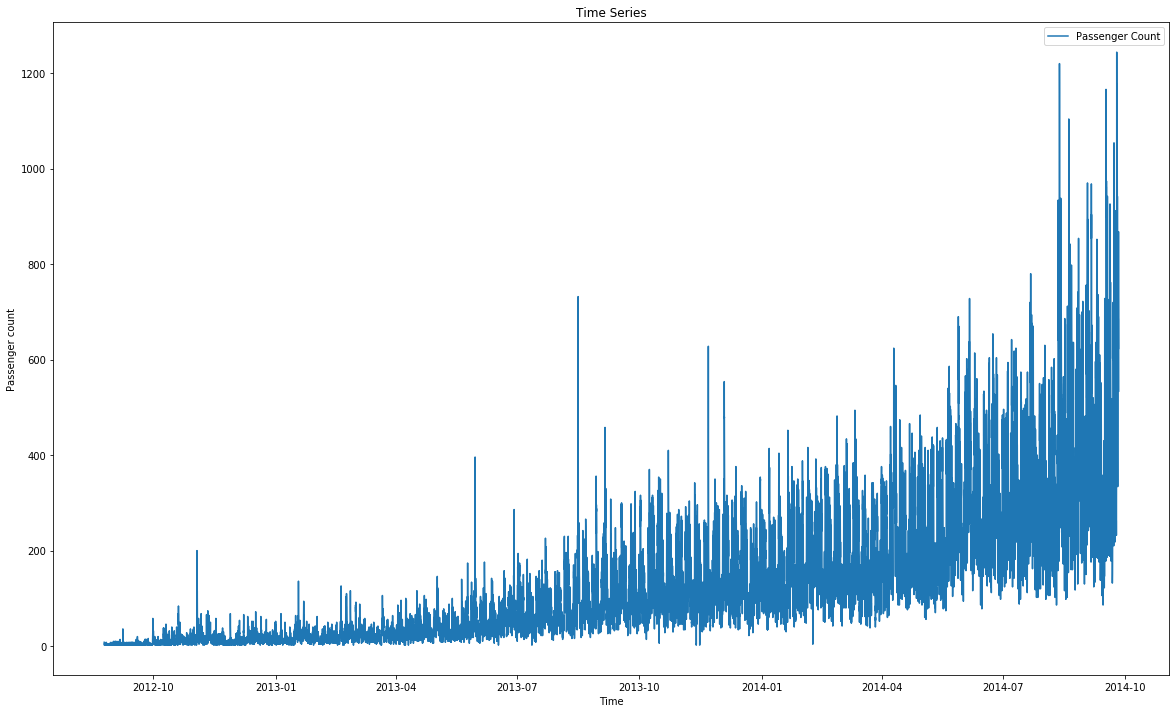

In [15]:
# plotting the time series based on count
# Making Datetime as index(so ID will not be index) to get the time period on the x-axis.
train.index = train['Datetime']
df = train.drop('ID', 1) # drop ID column to get only Datetime as X-axis
ts = df['Count'] # getting the dataframe data to variable
plt.figure(figsize = (20,12))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time")
plt.ylabel("Passenger count")
plt.legend(loc='best')

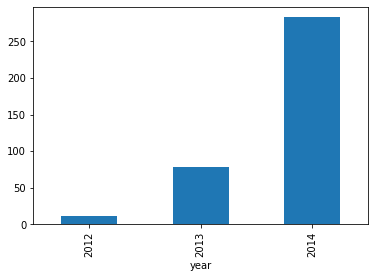

In [16]:
# Testing Hypothesis
# Hypothesis 1. traffic will increase with years passby
# groupby with years mean
train.groupby('year')['Count'].mean().plot.bar()

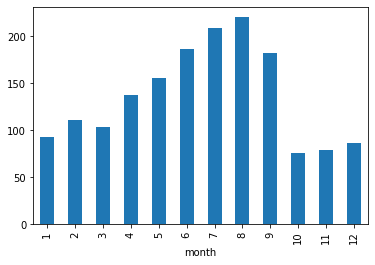

In [17]:
# Hypothesis 2. traffic increases between May and October
#group by between month and count
train.groupby('month')['Count'].mean().plot.bar()

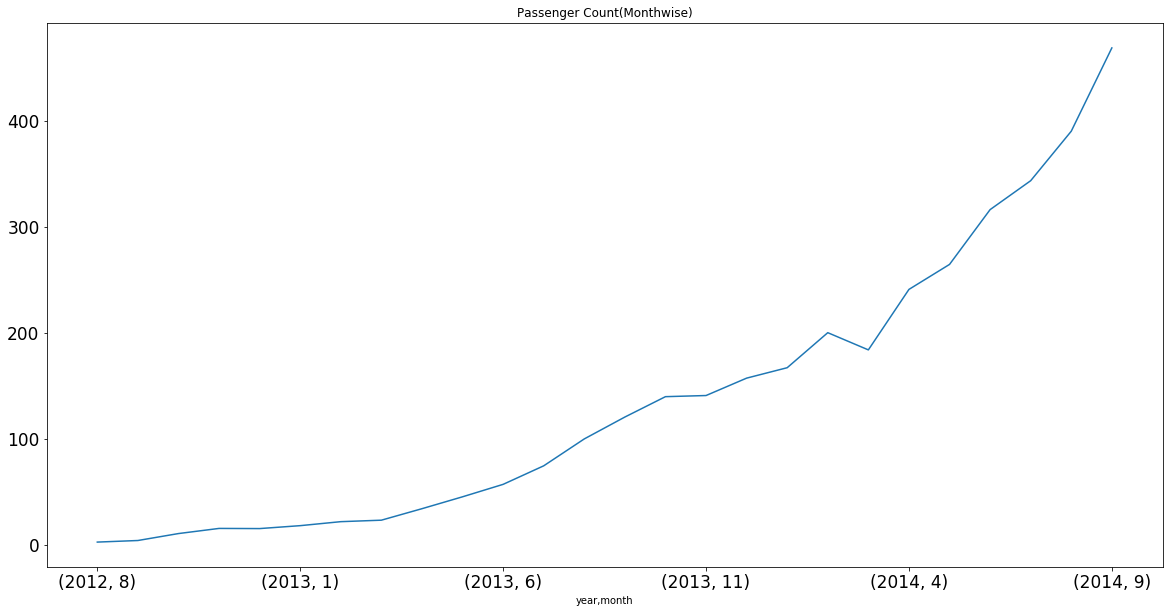

In [18]:
# Hypothesis 2 is proved wrong as October month has less traffic.
# groupby with month, year and count - to see the months present.
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize = (20,10), title = 'Passenger Count(Monthwise)', fontsize=17)

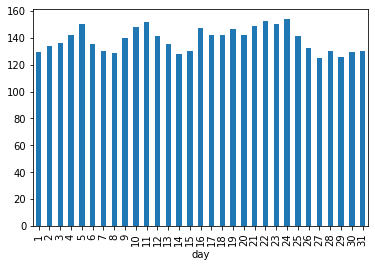

In [19]:
''' the above graph shows that number os passengers travelling are 
increasing inspite of missing 3 months in 2014.
Now we groupby day and count mean and check which days have large count'''
train.groupby('day')['Count'].mean().plot.bar()


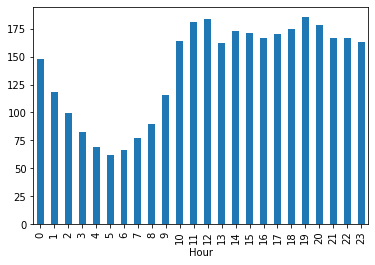

In [20]:
#hypothesis 3- peak hours have high traffic
# groupby hour and count mean
train.groupby('Hour')['Count'].mean().plot.bar()

The above graph shows that count of passengers increases from 5AM to 12PM
and there is a decrease between 7PM to 5AM.

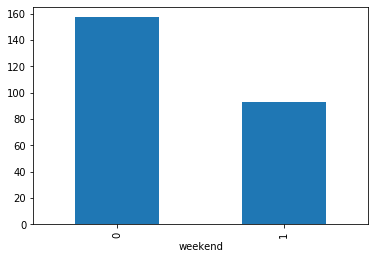

In [21]:
#Hypothesis 4- More traffic on weekdays
train.groupby('weekend')['Count'].mean().plot.bar()

The  graph shows that there will be more traffics on weekdays than weekends

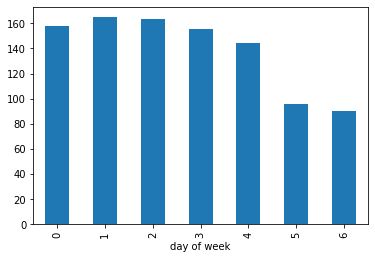

In [22]:
# lets try to get which days of week have more traffic
# groupby day of the week and count
train.groupby('day of week')['Count'].mean().plot.bar()

Above bar plot shows that passenger count less on weekend.

In [23]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [24]:
# dropping the ID column ass we want to use Datetime as index column
train = train.drop('ID',1)

In [25]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [27]:
# Make Datetime as index column
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

In [28]:
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

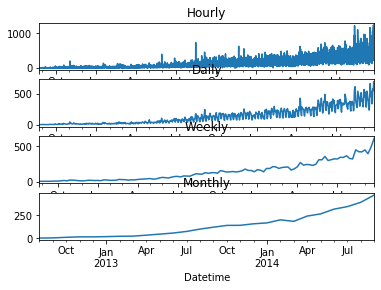

In [29]:
# lets plot the timely data with count
fig, axs = plt.subplots(4,1)
hourly.Count.plot(title ='Hourly', ax= axs[0])
daily.Count.plot(title ='Daily', ax= axs[1])
weekly.Count.plot(title ='Weekly', ax= axs[2])
monthly.Count.plot(title ='Monthly', ax= axs[3])
plt.show()

# Modelling the train data
# Splitting the train data to train and validation sets
tscv = TimeSeriesSplit(n_splits = 1)

for train_index, val_index in tscv.split(train):
    print("Train set", train_index, "Validation set:", val_index)
    train_train, train_val = train[train_index], train[val_index]
    

In [30]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [31]:
# Dividing the train set to training and validation sets
Train = train.loc['2012-08-25':'2014-06-24']
valid=train.loc['2014-06-25':'2014-09-25']

In [32]:
Train.tail()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2014-06-24 19:00:00,2014-06-24 19:00:00,398,2014,6,24,19,1,0
2014-06-24 20:00:00,2014-06-24 20:00:00,444,2014,6,24,20,1,0
2014-06-24 21:00:00,2014-06-24 21:00:00,406,2014,6,24,21,1,0
2014-06-24 22:00:00,2014-06-24 22:00:00,352,2014,6,24,22,1,0
2014-06-24 23:00:00,2014-06-24 23:00:00,390,2014,6,24,23,1,0


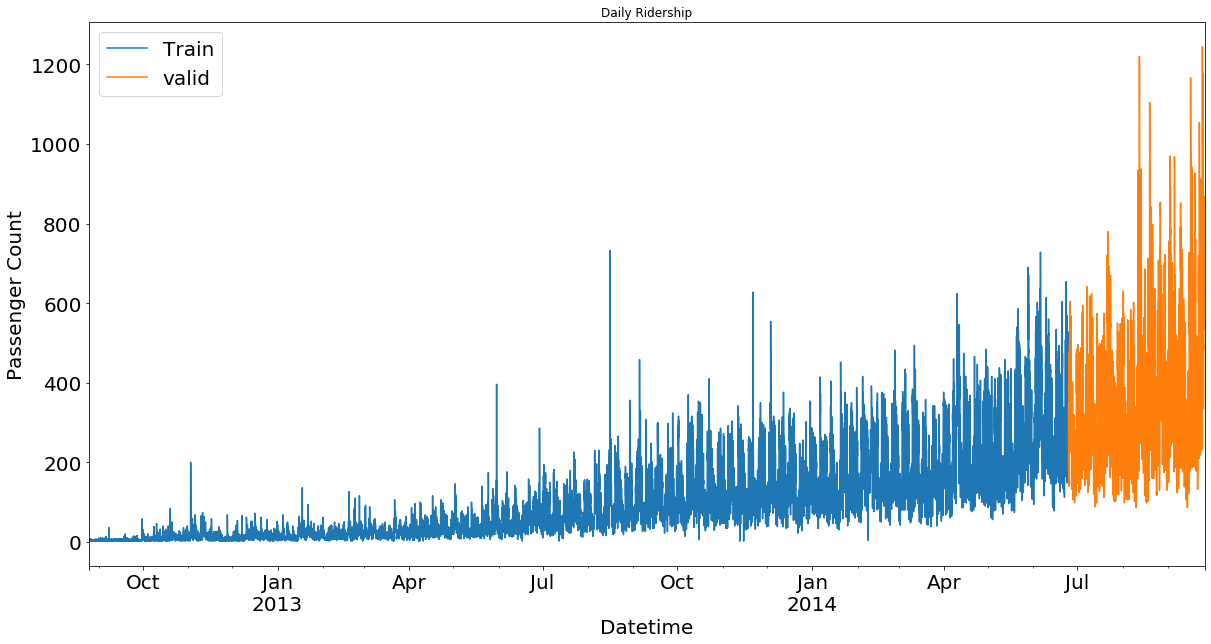

In [33]:
# plot the Train and valid sets
Train.Count.plot(figsize=(20,10), title = 'Daily Ridership', label='Train')
valid.Count.plot(figsize=(20,10), title = 'Daily Ridership', fontsize=20, label='valid')
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Passenger Count", fontsize=20)
plt.legend(loc=2, fontsize=20)
plt.show()

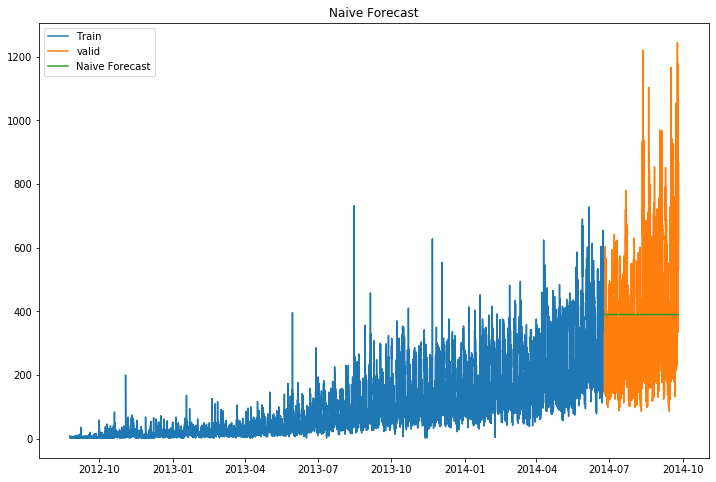

In [34]:
# Naive Approach
# next expected point is equal to the last observed point.
dd = np.asarray(Train.Count)
y_hat = valid.copy() #making a copy of valid set
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [35]:
# Calculating RMSE value for Naive Approach
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

186.37368520699056


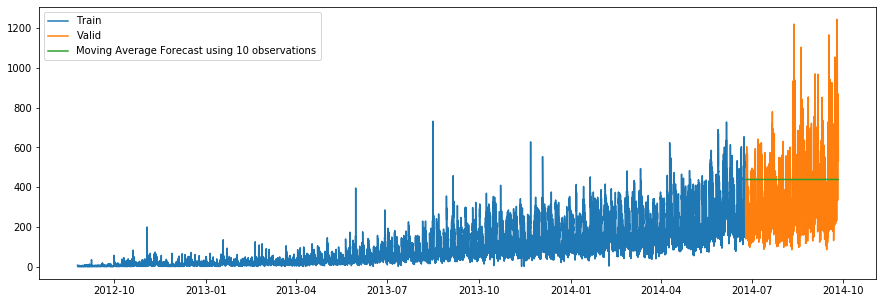

192.93805680435588


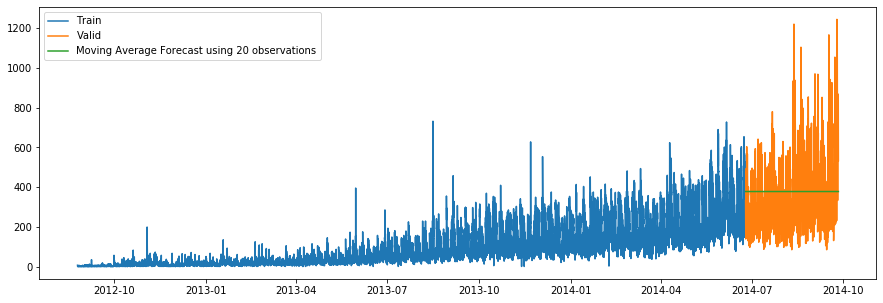

186.67900919256638


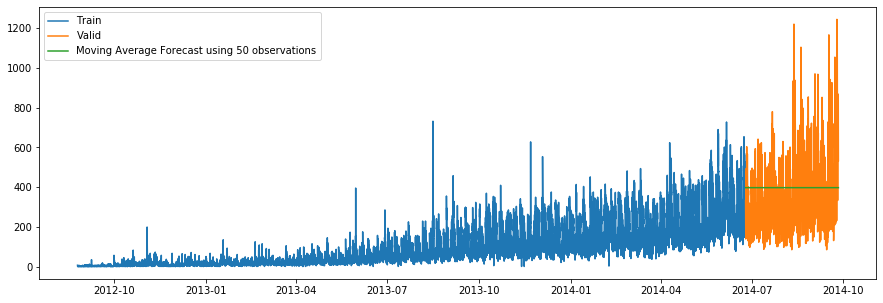

186.5773761711873


In [36]:
# Moving Average
# average of the passenger counts for last few specified time periods only.
y_hat_avg = valid.copy() 
# average of last 10 observations. 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)
# average of last 20 observations. 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)
# average of last 50 observations. 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

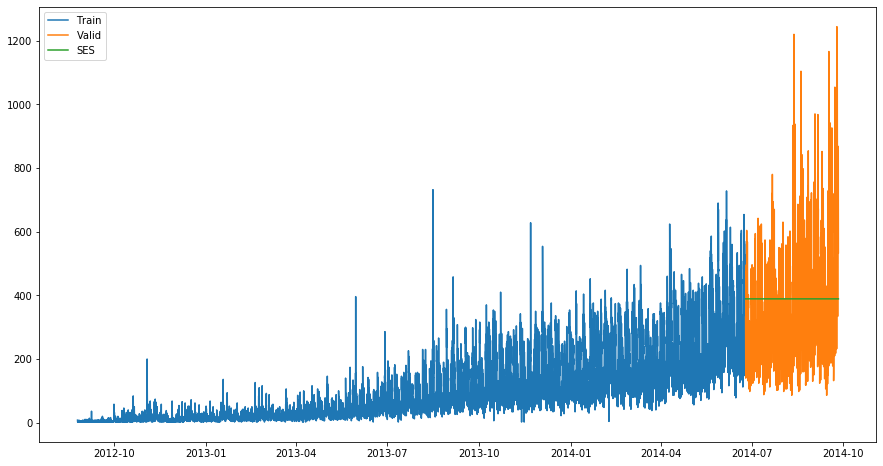

valid rms 186.3726920064363
train rms 305.24556503536445


In [37]:
# Simple Exponential Smoothing
# here larger weights to more recent observations than to observations from the distant past.
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
y_hat_avg1 = Train.copy()
fitM = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.5, optimized=False)
y_hat_avg['SES'] = fitM.forecast(len(valid))
y_hat_avg1['SES1'] = fitM.forecast(len(Train))

plt.figure(figsize=(15,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')

plt.legend(loc='best')
plt.show()
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print('valid rms', rms)
rms1 = sqrt(mean_squared_error(Train.Count, y_hat_avg1.SES1))
print('train rms', rms1)

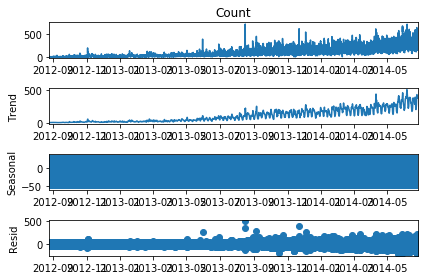

In [38]:
# Holt's Linear Trend Model
import statsmodels.api as sm 
import statsmodels.formula.api as smf
sm.tsa.seasonal_decompose(Train.Count).plot() 
# adfuller is used to test for a unit root in a univariate process in the presence of serial correlation.
result = sm.tsa.stattools.adfuller(Train.Count) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


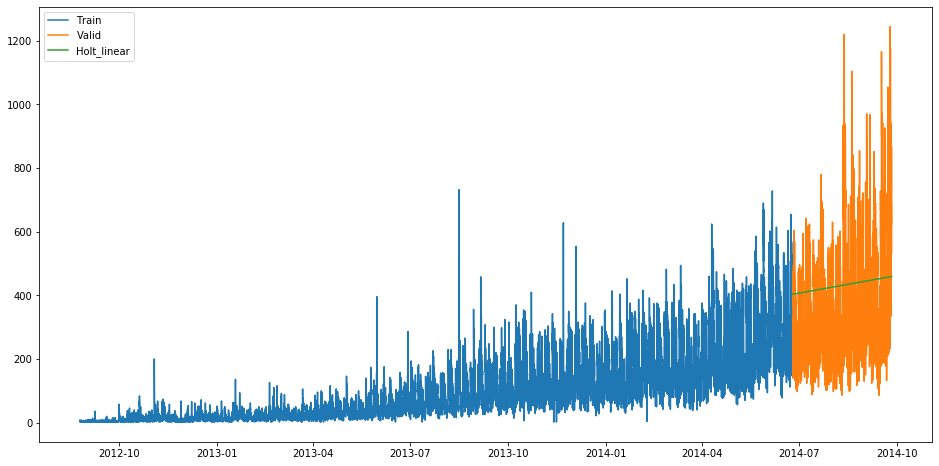

In [47]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [45]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

475.09398202897876
